In [1]:
import env
import os
import seaborn as sns
import matplotlib.pyplot as plt
import acquire
import prepare
import pandas as pd
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")


# In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. 

# Create a pandas dataframe, df_iris, from this data.

In [2]:
df_iris = sns.load_dataset("iris")

print the first 3 rows

In [3]:
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


print the number of rows and columns (shape)

In [4]:
df_iris.shape

(150, 5)

print the column names

In [5]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

print the data type of each column

In [6]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


print the summary statistics for each of the numeric variables. 

In [7]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Would you recommend rescaling the data based on these statistics?

It does not appear rescaling is necessary

# Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel

In [8]:
df_excel = pd.read_excel('Excel_Exercises.xlsx')

assign the first 100 rows to a new dataframe, df_excel_sample

In [9]:
df_excel_sample = df_excel.head(100)

print the number of rows of your original dataframe

In [10]:
print('df_excel has',len(df_excel),'rows')

df_excel has 7049 rows


print the first 5 column names

In [11]:
print(df_excel.columns[0:5].to_list())

['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents']


print the column names that have a data type of object

In [12]:
df_excel.select_dtypes(include='object').columns.to_list()

['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn']

compute the range for each of the numeric variables.

In [13]:
# create series with only the columns containing numbers, and their minimum/maximum values
mins = df_excel.select_dtypes(include='float64').min()
maxes = df_excel.select_dtypes(include='float64').max()

ranges = pd.concat([mins, maxes], axis=1)
ranges.columns =['min_value', 'max_value']
ranges.insert(2, "Range", ranges.max_value - ranges.min_value , True)
ranges

,min_value,max_value,Range
is_senior_citizen,0.00,1.00,1.0
phone_service,0.00,2.00,2.0
internet_service,0.00,2.00,2.0
contract_type,0.00,2.00,2.0
monthly_charges,18.25,118.75,100.5
total_charges,18.80,8684.80,8666.0


# Read the data from this google sheet into a dataframe, df_google

print the first three rows

In [14]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_import_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_google = pd.read_csv(csv_import_url)
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Print the number of rows and columns

In [15]:
df_google.shape

(891, 12)

Print the column names

In [16]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Print the datatype of each column

In [17]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


print the summary statistics for each of the numeric variables

In [18]:
df_excel.select_dtypes(include=['int64', 'float64']).describe()

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges
count,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7038.000000
mean,0.162009,1.324585,1.222585,0.690878,64.747014,2283.043883
std,0.368485,0.642709,0.779068,0.833757,30.099460,2266.521984
min,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,1.000000,1.000000,0.000000,35.450000,401.587500
50%,0.000000,1.000000,1.000000,0.000000,70.350000,1397.100000
75%,0.000000,2.000000,2.000000,1.000000,89.850000,3793.775000
max,1.000000,2.000000,2.000000,2.000000,118.750000,8684.800000


Print the unique values for each of your categorical variables

In [19]:
df_google.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [20]:
print("Unique values from 'Survived':",df_google['Survived'].unique())
print("Unique values from 'Pclass':",df_google['Pclass'].unique())
print("Unique values from 'Sex':",df_google['Sex'].unique())
print("Unique values from 'Embarked':",df_google['Embarked'].unique())

Unique values from 'Survived': [0 1]
Unique values from 'Pclass': [3 1 2]
Unique values from 'Sex': ['male' 'female']
Unique values from 'Embarked': ['S' 'C' 'Q' nan]


In [21]:
# testing data acquisition functions from acquire.py file I created
acquire.get_titanic_data()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,None,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,None,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [22]:
acquire.get_iris_data()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...,...
145,3,146,6.7,3.0,5.2,2.3,virginica
146,3,147,6.3,2.5,5.0,1.9,virginica
147,3,148,6.5,3.0,5.2,2.0,virginica
148,3,149,6.2,3.4,5.4,2.3,virginica


In [23]:
acquire.get_telco_data()

,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,1,2,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,Mailed check,DSL
1,1,2,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,Mailed check,DSL
2,2,1,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Electronic check,Fiber optic
3,2,1,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Electronic check,Fiber optic
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Mailed check,Fiber optic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,2,2,9987-LUTYD,Female,0,No,No,13,Yes,...,Yes,No,No,No,55.15,742.9,No,One year,Mailed check,DSL
7039,2,1,1,9992-RRAMN,Male,0,Yes,No,22,Yes,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Electronic check,Fiber optic
7040,1,2,1,9992-UJOEL,Male,0,No,No,2,Yes,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,Mailed check,DSL
7041,1,2,3,9993-LHIEB,Male,0,Yes,Yes,67,Yes,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,Mailed check,DSL


The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

This work should all be saved in your local classification-exercises repo. Then add, commit, and push your changes.

Using the Iris Data:

Use the function defined in acquire.py to load the iris data.

Drop the species_id and measurement_id columns.

Rename the species_name column to just species.

Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [24]:
# load the iris data using our function in the acquire file
iris_df = acquire.get_iris_data()

In [25]:
# verify that it loaded and show the first few lines of data
iris_df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [26]:
# Drop the species_id and measurement_id columns
iris_df = iris_df.drop(columns=['species_id','measurement_id'])
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
# rename the species_name column to species

iris_df.rename(columns = {'species_name':'species'}, inplace = True)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [28]:
iris_df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [29]:
# Create dummy variables of the species name    
dummy_df = pd.get_dummies(iris_df['species'], dummy_na=False, drop_first=False)

# concatenate onto the iris dataframe.
iris_df = pd.concat([iris_df, dummy_df], axis=1)
iris_df.head(1)


,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0


In [30]:
# Create a function named prep_iris that accepts the untransformed iris data, 
# and returns the data with the transformations above applied.

def prep_iris(df):
    # Drop the species_id and measurement_id columns
    df = df.drop(columns=['species_id','measurement_id'])
    
    # rename the species_name column to species
    df.rename(columns = {'species_name':'species'}, inplace = True)
    
    # Create dummy variables of the species name    
    dummy_df = pd.get_dummies(df['species'], dummy_na=False, drop_first=False)

    # concatenate onto the iris dataframe.
    df = pd.concat([df, dummy_df], axis=1)
    
    # return the converted iris dataframe
    return df


Using the Titanic dataset

Use the function defined in acquire.py to load the Titanic data.

Drop any unnecessary, unhelpful, or duplicated columns.

Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [31]:
df = acquire.get_titanic_data()

In [32]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [33]:
# Drop unnecessary columns (pclass)
df = df.drop(columns=['pclass'])
df.head()

,passenger_id,survived,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [34]:
# Create dummy variables of the categorical columns   
dummy_df = pd.get_dummies(df[['sex','class','embark_town']], dummy_na=False, drop_first=False)

# concatenate onto the titanic dataframe.
df = pd.concat([df, dummy_df], axis=1)
df.head()

,passenger_id,survived,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone,sex_female,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,0,male,22.0,1,0,7.2500,S,Third,None,Southampton,0,0,1,0,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0,1,0,1,0,0,1,0,0
2,2,1,female,26.0,0,0,7.9250,S,Third,None,Southampton,1,1,0,0,0,1,0,0,1
3,3,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0,1,0,1,0,0,0,0,1
4,4,0,male,35.0,0,0,8.0500,S,Third,None,Southampton,1,0,1,0,0,1,0,0,1


Use the function defined in acquire.py to load the Telco data.

Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [35]:
df = acquire.get_telco_data()
df.columns

Index(['internet_service_type_id', 'payment_type_id', 'contract_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'payment_type',
       'internet_service_type'],
      dtype='object')

In [36]:
# Drop any unnecessary, unhelpful, or duplicated columns. 
df = df.drop(columns=['contract_type_id','internet_service_type_id', 'payment_type_id', 'contract_type_id.1',
                      'payment_type_id.1', 'monthly_charges.1','total_charges.1','paperless_billing.1',])


KeyError: "['contract_type_id.1', 'payment_type_id.1', 'monthly_charges.1', 'total_charges.1', 'paperless_billing.1'] not found in axis"

In [ ]:
# Encode the categorical columns. 
# Create dummy variables of the categorical columns and concatenate them onto the dataframe.

# Create dummy variables of the categorical columns  
dummy_df = pd.get_dummies(df[['gender','contract_type','internet_service_type']], dummy_na=False, drop_first=False)

# concatenate onto the telco dataframe.
df = pd.concat([df, dummy_df], axis=1)
df.head()

In [ ]:
# testing functions in prepare.py

In [ ]:
i_df = acquire.get_iris_data()
i_df = prepare.prep_iris(i_df)
i_df.head()

In [ ]:
i_df.to_csv('iris.csv', index=False)

In [ ]:
t_df = acquire.get_titanic_data()
t_df = prepare.prep_titanic(t_df)
t_df.head()

In [ ]:
t_df.to_csv('titanic.csv', index=False)

In [ ]:
tel_df = acquire.get_telco_data()
tel_df = prepare.prep_telco(tel_df)
tel_df.head()

In [ ]:
# created split functions to split telco, iris, and titanic into train, validate, and test data splits

In [ ]:
# acquire iris data
i_df = acquire.get_iris_data()

In [ ]:
# call split function on iris dataframe
target = 'species'
train_iris, validate_iris, test_iris = prepare.my_split(i_df, target)

In [ ]:
# validate shapes of data_sets look correct
train_iris.shape,test_iris.shape,validate_iris.shape

In [ ]:
# acquire telco data
tel_df = acquire.get_telco_data()

In [ ]:
# call split function
target = 'churn'
train_telco, validate_telco, test_telco = prepare.my_split(tel_df, target)

In [ ]:
# validate shapes of data_sets look correct
train_telco.shape, validate_telco.shape, test_telco.shape

In [ ]:
# get titanic data
tit_df = acquire.get_titanic_data()

In [ ]:
# call split function
target = 'survived'
train_titanic, validate_titanic, test_titanic = prepare.my_split(tit_df, target)

In [ ]:
# validate shapes of data_sets look correct
train_titanic.shape, validate_titanic.shape, test_titanic.shape

# Eploratory Analysis

## Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

### 1. Acquire, prepare & split your data.



In [ ]:
# acquire using our acquire function
irisdf = acquire.get_iris_data()
irisdf

In [ ]:
# prepare using our prep function
irisdf = prepare.prep_iris(irisdf)
irisdf

In [ ]:
# split using our split function and validate the size of each dataset
train, validate, test = prepare.my_split(irisdf, target='species')
train.shape, validate.shape, test.shape

## Univariate Stats

For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

Document takeaways & any actions

In [ ]:
# explore our train dataset
train.info()

In [ ]:
train.species.value_counts()

 - equal distribution of species 
 - petals are longer than they are wide


In [ ]:
# split into numerical and categorical variables.  Ignoring species binary columns since they are derived from
# from the target column.  Obviously these would directly correlate with our target value of species
num_vars = ['sepal _length', 'sepal_width', 'petal_length', 'petal_width']
cat_vars = ['species']

# our only categorical variable is the target, species

# For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).


In [ ]:
sns.histplot(data=train, x='sepal_length')
plt.title('Sepal Length appears normally distributed')
plt.axvline(train.sepal_length.mean(), label = 'average sepal length')
plt.show()

In [ ]:
sns.boxplot(x='sepal_length', data=train)
plt.title('Sepal Length appears normally distributed')
plt.show()

In [ ]:
sns.histplot(data=train, x='sepal_width')
plt.title('Sepal Width appears normally distributed')
plt.axvline(train.sepal_width.mean(), label = 'average sepal width')
plt.show()

In [ ]:
sns.boxplot(x='sepal_width', data=train)
plt.title('Sepal Length appears normally distributed')
plt.show()

10% of data is outliers

In [ ]:
sns.histplot(data=train, x='petal_length')
plt.title('Petal Length appears in two clusters')
plt.axvline(train.petal_length.mean(), label = 'average petal length')
plt.show()

In [ ]:
sns.boxplot(x='petal_length', data=train)
plt.title('Petal Length')
plt.show()

In [ ]:
sns.histplot(data=train, x='petal_width')
plt.title('Petal Width appears in two clusters')
plt.axvline(train.petal_width.mean(), label = 'average petal width')
plt.show()

In [ ]:
sns.boxplot(x='petal_width', data=train)
plt.title('Petal Width')
plt.show()

- It appears that sepal size is consistant, but petal size has two very discernable size groups

In [ ]:
train.describe(include='all')

# Bivariate Stats

Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).



In [ ]:
sns.barplot(x='species', y='sepal_width', data=train)
plt.axhline(train.sepal_width.mean(), label = 'average sepal width')
plt.show()

In [ ]:
sns.barplot(x='species', y='sepal_length', data=train)
plt.axhline(train.sepal_length.mean(), label = 'average sepal length')
plt.show()

In [ ]:
sns.barplot(x='species', y='petal_width', data=train)
plt.axhline(train.petal_width.mean(), label = 'average petal width')
plt.show()

In [ ]:
sns.barplot(x='species', y='petal_length', data=train)
plt.axhline(train.petal_length.mean(), label = 'average petal length')
plt.show()

## For each measurement type, compute the descriptive statistics for each species.



In [ ]:
train[train.species == 'setosa'].describe()

In [ ]:
train[train.species == 'versicolor'].describe()

In [ ]:
train[train.species == 'virginica'].describe()

## For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [ ]:
H0 = 'petal width has no correlation with the versicolor species'
H1 = 'petal width has a correlation with the versicolor species'

alpha = .05
stat, p_value = stats.mannwhitneyu(train.petal_width, train.versicolor)

if p_value < alpha:
    print('We reject the null hypothesis,', H1)
else:
    print('The null hypothesis is confirmed,', H0)

In [ ]:
H0 = 'petal length has no correlation with the versicolor species'
H1 = 'petal length has a correlation with the versicolor species'

alpha = .05
stat, p_value = stats.mannwhitneyu(train.petal_length, train.versicolor)

if p_value < alpha:
    print('We reject the null hypothesis,', H1)
else:
    print('The null hypothesis is confirmed,', H0)

In [ ]:
H0 = 'sepal width has no correlation with the versicolor species'
H1 = 'sepal width has a correlation with the versicolor species'

alpha = .05
stat, p_value = stats.mannwhitneyu(train.sepal_width, train.versicolor)

if p_value < alpha:
    print('We reject the null hypothesis,', H1)
else:
    print('The null hypothesis is confirmed,', H0)

In [ ]:
H0 = 'sepal length has no correlation with the versicolor species'
H1 = 'sepal length has a correlation with the versicolor species'

alpha = .05
stat, p_value = stats.mannwhitneyu(train.sepal_length, train.versicolor)

if p_value < alpha:
    print('We reject the null hypothesis,', H1)
else:
    print('The null hypothesis is confirmed,', H0)

In [ ]:
H0 = 'petal width has no correlation with the virginica species'
H1 = 'petal width has a correlation with the virginica species'

alpha = .05
stat, p_value = stats.mannwhitneyu(train.petal_width, train.virginica)

if p_value < alpha:
    print('We reject the null hypothesis,', H1)
else:
    print('The null hypothesis is confirmed,', H0)

In [ ]:
H0 = 'petal length has no correlation with the virginica species'
H1 = 'petal length has a correlation with the virginica species'

alpha = .05
stat, p_value = stats.mannwhitneyu(train.petal_length, train.virginica)

if p_value < alpha:
    print('We reject the null hypothesis,', H1)
else:
    print('The null hypothesis is confirmed,', H0)

In [ ]:
H0 = 'sepal width has no correlation with the viriginica species'
H1 = 'sepal width has a correlation with the virginica species'

alpha = .05
stat, p_value = stats.mannwhitneyu(train.sepal_width, train.virginica)

if p_value < alpha:
    print('We reject the null hypothesis,', H1)
else:
    print('The null hypothesis is confirmed,', H0)

In [ ]:
H0 = 'sepal length has no correlation with the virginica species'
HA = 'sepal length has a correlation with the virginica species'

alpha = .05
stat, p_value = stats.mannwhitneyu(train.sepal_length, train.virginica)

if p_value < alpha:
    print('We reject the null hypothesis,', H1)
else:
    print('The null hypothesis is confirmed,', HA)

###  All petal and sepal measurements show correlation with the species

Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

In [ ]:
sns.scatterplot(data=train, x='petal_width', y='petal_length', hue='species')
plt.title('Petal size and species')
plt.show()

it appears petal dimensions are grouped by species

In [ ]:
sns.scatterplot(data=train, x='sepal_width', y='sepal_length', hue='species')
plt.title('Sepal size and species')
plt.show()

Sepal size helps distinguish Setosas, but has a less-clear distinction between Versicolor/Virginica

In [ ]:
sns.scatterplot(data=train, x='petal_width', y='sepal_width', hue='species')
plt.title('Sepal and Petal widths and species')
plt.show()

In [ ]:
sns.scatterplot(data=train, x='petal_length', y='sepal_length', hue='species')
plt.title('Sepal and Petal lengths and species')
plt.show()

### Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

In [ ]:
sns.relplot(data=train, x='petal_length', y='petal_width', hue='species')
plt.show()

### Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization

In [ ]:
temp = train.drop(columns=['versicolor', 'virginica'])
temp = temp.melt(id_vars=['species'], var_name='measurement', value_name='value')

In [ ]:
sns.swarmplot(data=temp, x='measurement', y='value', hue='species')
plt.show()

This plot reinforces that petal size is the most distinct way to determine species

### Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

In [ ]:
# create seperate lists of the sepal areas from each species 
virginicas = train[train.species == 'virginica']
setosa = train[train.species == 'setosa']
setosa_sepal_area = setosa.sepal_length * setosa.sepal_width
virginca_seap_area = virginicas.sepal_length * virginicas.sepal_width


In [ ]:
# form hypothesis
H0 = 'there is no difference in the sepal area between virginicas and setosas'
Ha = 'there is a difference in the sepal area between virginicas and setosas'

In [ ]:
# plot 
v_s = pd.concat([setosa, virginicas], axis=0)
v_s['sepal_area'] = v_s['sepal_width'] * v_s['sepal_length']
v_s

sns.barplot(data=v_s, x='species', y='sepal_area')
plt.title('The sepal area of virginicas is larger than that of setosas')
plt.show()

In [ ]:
# find confidence level to determine if variance is True/False
    #H0 variance is equal
    #Ha variance is inqual
stat, p = stats.levene(setosa_sepal_area, virginca_seap_area)
if p > alpha:
    print(p, 'variance is equal')
else:
    print(p, 'variance is inequal')

normality can be assumed because there are 30 of each value

In [ ]:
# perform t-test to test hypothesis
t, p = stats.ttest_ind(setosa_sepal_area, virginca_seap_area, equal_var=True)
if p_value < alpha:
    print('We reject the null hypothesis,', Ha)
else:
    print('The null hypothesis is confirmed,', H0)

# Part II
## Explore your titanic dataset more completely.



In [ ]:
# acquire data using the function in our acquire file
titanicdf = acquire.get_titanic_data()
titanicdf.head()

In [ ]:
# prepare file using our prepare function
titanicdf = prepare.prep_titanic(titanicdf)
titanicdf

In [ ]:
# split into train/validate/test using our split function and verify size of returned dataframes
train, validate, test = prepare.my_split(titanicdf, target = 'survived')
train.shape, validate.shape, test.shape

In [ ]:
# Stratification means we'll get even proportions of the target variable in each data set
train.survived.mean(), validate.survived.mean(), test.survived.mean()

In [ ]:
train.info()

In [ ]:
train.describe(include='all')

- most passengers are in 3rd class
- 63% men
- 76% embarked from southampton
- 56% traveling alone
- median fare 15.9, average fare 37
- outlier in fare of 512

In [ ]:
num_vars = ['fare']
cat_vars = ['survived', 'pclass', 'sex_male', 'sibsp', 'parch', 'alone',
            'embark_town_Queenstown', 'embark_town_Southampton','embark_town_Cherbourg'
           ]

In [ ]:
for col in cat_vars:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train)
    plt.show()

Explore Univariate Numeric Variables

In [ ]:
train.fare.hist()

In [ ]:
sns.boxplot(x='fare', data=train)

In [ ]:
plt.title('Third class appears less likely to survive')
sns.barplot(x='pclass', y='survived', data=train)
pop_survival_rate = train.survived.mean()
plt.axhline(pop_survival_rate, label = 'population survival rate')
plt.legend()
plt.show()


- if we had deck data, we could explore whether this was related to the deck they were on. 
- let's test the relationships of class to survival: chi2 test

In [ ]:
alpha = 0.05
null_hyp = "survival and class are independent"
alternative_hyp = "there is a relationship between survival and class"

# set up a crosstab of observed values
observed = pd.crosstab(train.survived, train.pclass)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("reject the null hypothesis that", null_hyp)
    print("there appears to be a relationship between survival and class")
else:
    print("fail to reject the null hypothesis that", null_hyp)

In [ ]:
plt.title("Females are more likely to survive")
sns.barplot(x='sex_male', y='survived', data=train)
pop_survival_rate = train.survived.mean()
plt.axhline(pop_survival_rate, label='population survival rate')
plt.legend()
plt.show()

In [ ]:
def cat_vis(train, col):
    plt.title('Relationship of survival rate and '+col)
    sns.barplot(x=col, y='survived', data=train)
    survival_rate = train.survived.mean()
    plt.axhline(survival_rate, label='survival rate')
    plt.legend()
    plt.show()
    
    
def cat_test(train, col):
    alpha = 0.05
    null_hyp = col+' and survival rate are independent'
    alt_hyp = 'There is a relationship between survival rate and '+col
    observed = pd.crosstab(train.survived, train[col])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    if p < alpha:
        print('We reject the null hypothesis that', null_hyp)
        print(alt_hyp)
    else:
        print('We fail to reject the null hypothesis that', null_hyp)
        print('There appears to be no relationship between survival rate and '+col)

def cat_analysis(train, col):
    cat_vis(train, col)
    cat_test(train, col)

In [ ]:
# execute tests for cat_vars
for col in cat_vars:
    cat_analysis(train, col)

**Takeaways**

- Embarking from a place other than southampton is more likely to survive. 
- Traveling alone is less likely to survive
- It appears traveling with 3+ have lower survival rate
- Females more likely to survive
- third class less likely to survive

In [ ]:
sns.barplot(x='sex', y='survived', hue='alone', data=train)
plt.title('Survival rate for each sex and being unaccompanied')
plt.show()

In [ ]:
# Do women with other passengers have a higher survival rate than women traveling alone? 
females = train[train.sex_male == 0]
cat_test(females, 'alone')

# Part III
### Explore your telco data to discover drivers of churn

In [38]:
# get telco data using our acquire function
telco = acquire.get_telco_data()
telco.head()

,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,1,2,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,Mailed check,DSL
1,1,2,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,Mailed check,DSL
2,2,1,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Electronic check,Fiber optic
3,2,1,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Electronic check,Fiber optic
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Mailed check,Fiber optic


In [39]:
# prep telco using our prepare function
telco = prepare.prep_telco(telco)
telco.head()

,senior_citizen,tenure,monthly_charges,total_charges,churn,male,partner,dependents,phone_service,paperless_billing_Yes,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None
0,0,9,65.6,593.30,0,0,1,1,1,1,...,0,1,0,0,0,0,1,1,0,0
1,0,9,59.9,542.40,0,1,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0
2,0,4,73.9,280.85,1,1,0,0,1,1,...,1,0,0,0,0,1,0,0,1,0
3,1,13,98.0,1237.85,1,1,1,0,1,1,...,1,0,0,0,0,1,0,0,1,0
4,1,3,83.9,267.40,1,0,1,0,1,1,...,1,0,0,0,0,0,1,0,1,0


In [40]:
telco.shape

(7043, 41)

In [41]:
telco.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
total_charges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80
churn,7043.0,0.265370,0.441561,0.00,0.00,0.00,1.00,1.00
male,7043.0,0.504756,0.500013,0.00,0.00,1.00,1.00,1.00
partner,7043.0,0.483033,0.499748,0.00,0.00,0.00,1.00,1.00
dependents,7043.0,0.299588,0.458110,0.00,0.00,0.00,1.00,1.00
phone_service,7043.0,0.903166,0.295752,0.00,1.00,1.00,1.00,1.00
paperless_billing_Yes,7043.0,0.592219,0.491457,0.00,0.00,1.00,1.00,1.00


- data doesn't have any nulls
- 25% have churned
- even split for sex
- 16% senior citizens

In [42]:
# split data into train,validate,test using our defined function and validate sizes of returned DF's
train, validate, test = prepare.my_split(telco, target='churn')
train.shape, validate.shape, test.shape

((4225, 41), (1409, 41), (1409, 41))

In [43]:
# define variable types
nums = ['tenure', 'monthly_charges', 'total_charges']
cats = ['senior_citizen',
         'churn',
         'male',
         'partner',
         'dependents',
         'phone_service',
         'paperless_billing_Yes',
         'multiple_lines_No',
         'multiple_lines_No phone service',
         'multiple_lines_Yes',
         'online_security_No',
         'online_security_No internet service',
         'online_security_Yes',
         'online_backup_No',
         'online_backup_No internet service',
         'online_backup_Yes',
         'device_protection_No',
         'device_protection_No internet service',
         'device_protection_Yes',
         'tech_support_No',
         'tech_support_No internet service',
         'tech_support_Yes',
         'streaming_tv_No',
         'streaming_tv_No internet service',
         'streaming_tv_Yes',
         'streaming_movies_No',
         'streaming_movies_No internet service',
         'streaming_movies_Yes',
         'contract_type_Month-to-month',
         'contract_type_One year',
         'contract_type_Two year',
         'payment_type_Bank transfer (automatic)',
         'payment_type_Credit card (automatic)',
         'payment_type_Electronic check',
         'payment_type_Mailed check',
         'internet_service_type_DSL',
         'internet_service_type_Fiber optic',
         'internet_service_type_None']

In [44]:
# define functions to plot data

def cat_vis(train, col):
    plt.title('Relationship of churn rate and '+col)
    sns.barplot(x=col, y='churn', data=train)
    churn_rate = train.churn.mean()
    plt.axhline(churn_rate, label='churn rate')
    plt.legend()
    plt.show()
    
    
def cat_test(train, col):
    alpha = 0.05
    null_hyp = col+' and churn rate are independent'
    alt_hyp = 'There is a relationship between churn rate and '+col
    observed = pd.crosstab(train.churn, train[col])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    if p < alpha:
        print('We reject the null hypothesis that', null_hyp)
        print(alt_hyp)
    else:
        print('We fail to reject the null hypothesis that', null_hyp)
        print('There appears to be no relationship between churn rate and '+col)

def cat_analysis(train, col):
    cat_vis(train, col)
    cat_test(train, col)

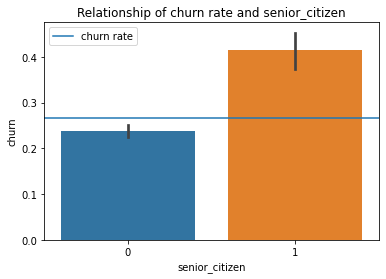

We reject the null hypothesis that senior_citizen and churn rate are independent
There is a relationship between churn rate and senior_citizen


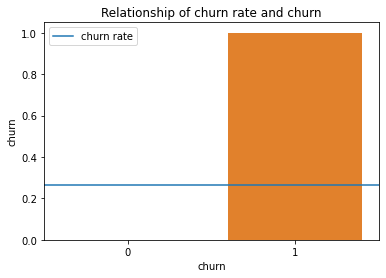

We reject the null hypothesis that churn and churn rate are independent
There is a relationship between churn rate and churn


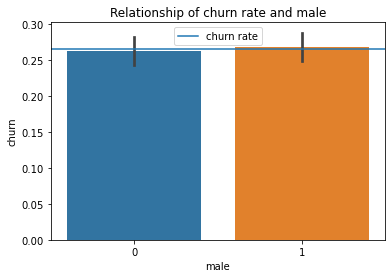

We fail to reject the null hypothesis that male and churn rate are independent
There appears to be no relationship between churn rate and male


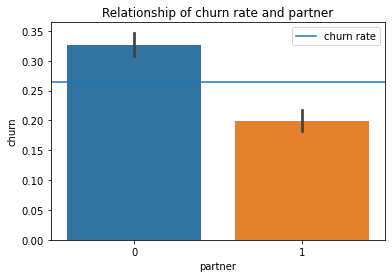

We reject the null hypothesis that partner and churn rate are independent
There is a relationship between churn rate and partner


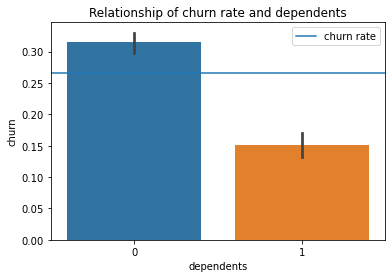

We reject the null hypothesis that dependents and churn rate are independent
There is a relationship between churn rate and dependents


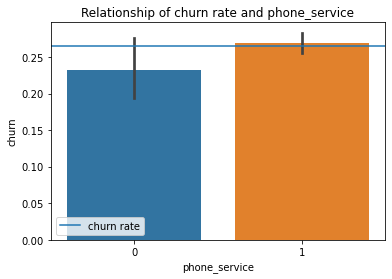

We fail to reject the null hypothesis that phone_service and churn rate are independent
There appears to be no relationship between churn rate and phone_service


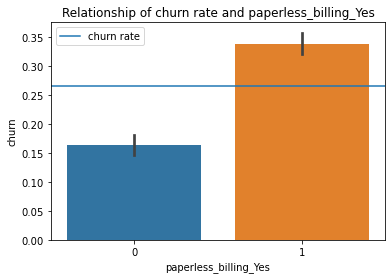

We reject the null hypothesis that paperless_billing_Yes and churn rate are independent
There is a relationship between churn rate and paperless_billing_Yes


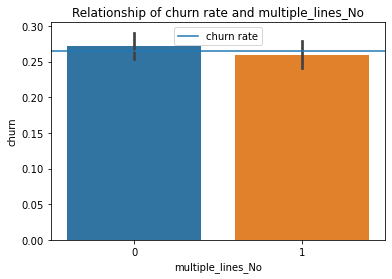

We fail to reject the null hypothesis that multiple_lines_No and churn rate are independent
There appears to be no relationship between churn rate and multiple_lines_No


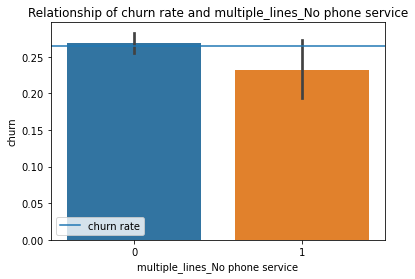

We fail to reject the null hypothesis that multiple_lines_No phone service and churn rate are independent
There appears to be no relationship between churn rate and multiple_lines_No phone service


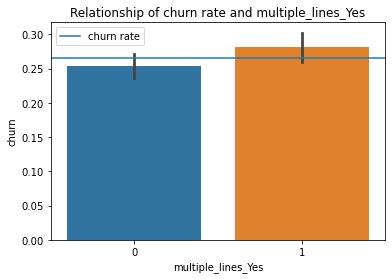

We fail to reject the null hypothesis that multiple_lines_Yes and churn rate are independent
There appears to be no relationship between churn rate and multiple_lines_Yes


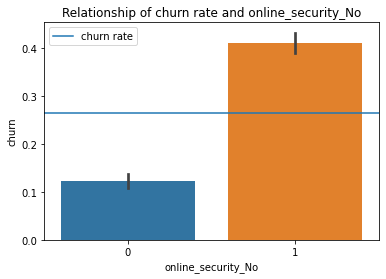

We reject the null hypothesis that online_security_No and churn rate are independent
There is a relationship between churn rate and online_security_No


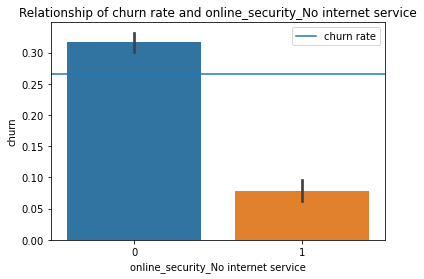

We reject the null hypothesis that online_security_No internet service and churn rate are independent
There is a relationship between churn rate and online_security_No internet service


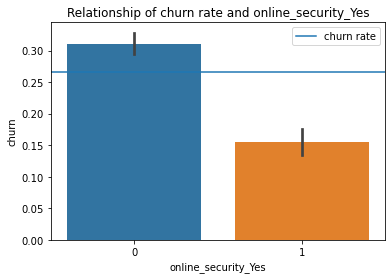

We reject the null hypothesis that online_security_Yes and churn rate are independent
There is a relationship between churn rate and online_security_Yes


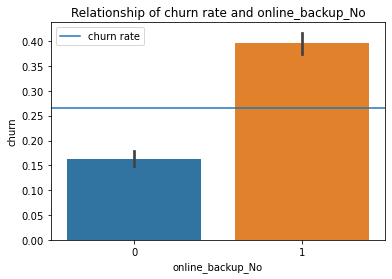

We reject the null hypothesis that online_backup_No and churn rate are independent
There is a relationship between churn rate and online_backup_No


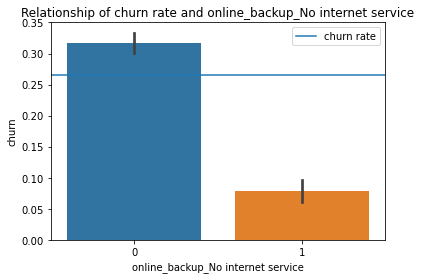

We reject the null hypothesis that online_backup_No internet service and churn rate are independent
There is a relationship between churn rate and online_backup_No internet service


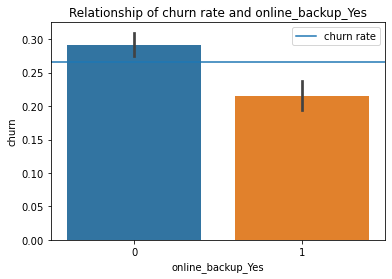

We reject the null hypothesis that online_backup_Yes and churn rate are independent
There is a relationship between churn rate and online_backup_Yes


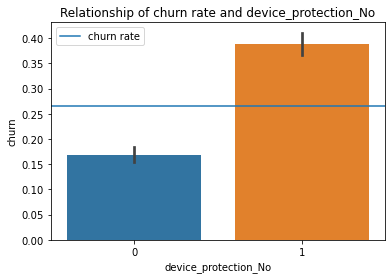

We reject the null hypothesis that device_protection_No and churn rate are independent
There is a relationship between churn rate and device_protection_No


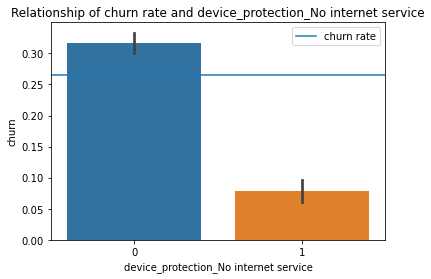

We reject the null hypothesis that device_protection_No internet service and churn rate are independent
There is a relationship between churn rate and device_protection_No internet service


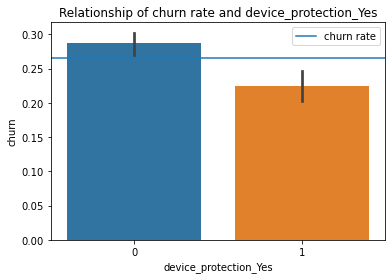

We reject the null hypothesis that device_protection_Yes and churn rate are independent
There is a relationship between churn rate and device_protection_Yes


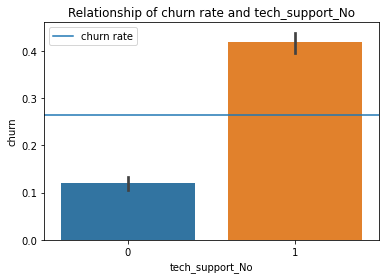

We reject the null hypothesis that tech_support_No and churn rate are independent
There is a relationship between churn rate and tech_support_No


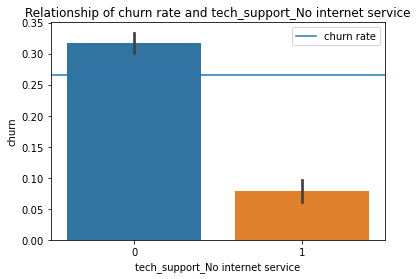

We reject the null hypothesis that tech_support_No internet service and churn rate are independent
There is a relationship between churn rate and tech_support_No internet service


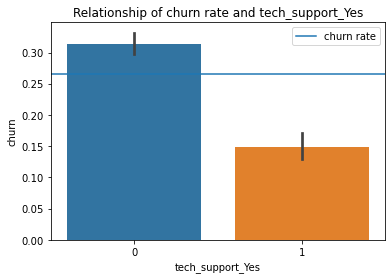

We reject the null hypothesis that tech_support_Yes and churn rate are independent
There is a relationship between churn rate and tech_support_Yes


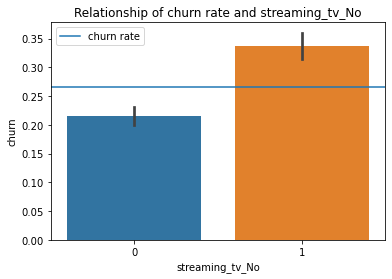

We reject the null hypothesis that streaming_tv_No and churn rate are independent
There is a relationship between churn rate and streaming_tv_No


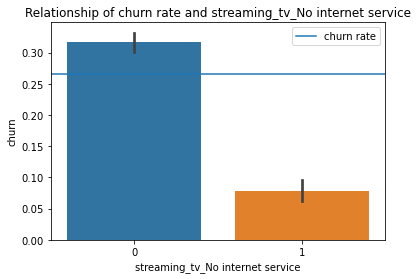

We reject the null hypothesis that streaming_tv_No internet service and churn rate are independent
There is a relationship between churn rate and streaming_tv_No internet service


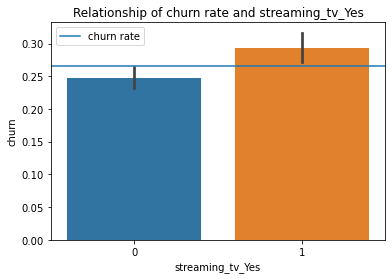

We reject the null hypothesis that streaming_tv_Yes and churn rate are independent
There is a relationship between churn rate and streaming_tv_Yes


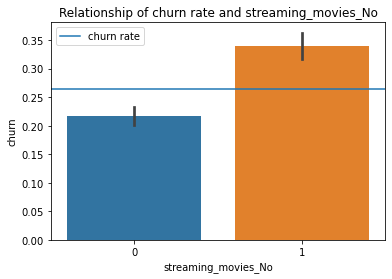

We reject the null hypothesis that streaming_movies_No and churn rate are independent
There is a relationship between churn rate and streaming_movies_No


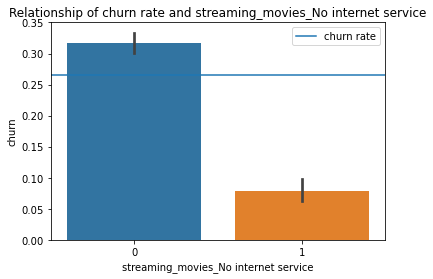

We reject the null hypothesis that streaming_movies_No internet service and churn rate are independent
There is a relationship between churn rate and streaming_movies_No internet service


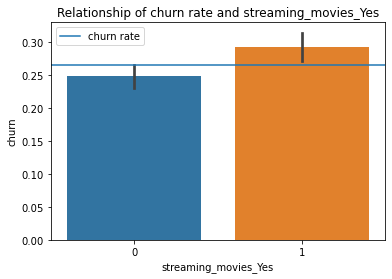

We reject the null hypothesis that streaming_movies_Yes and churn rate are independent
There is a relationship between churn rate and streaming_movies_Yes


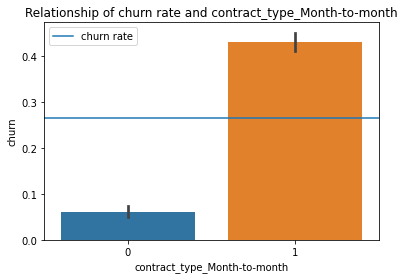

We reject the null hypothesis that contract_type_Month-to-month and churn rate are independent
There is a relationship between churn rate and contract_type_Month-to-month


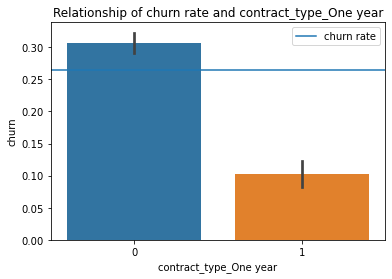

We reject the null hypothesis that contract_type_One year and churn rate are independent
There is a relationship between churn rate and contract_type_One year


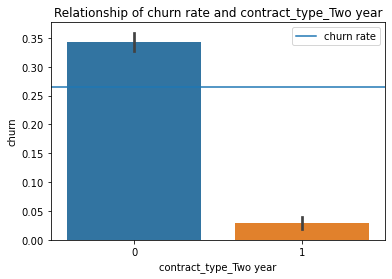

We reject the null hypothesis that contract_type_Two year and churn rate are independent
There is a relationship between churn rate and contract_type_Two year


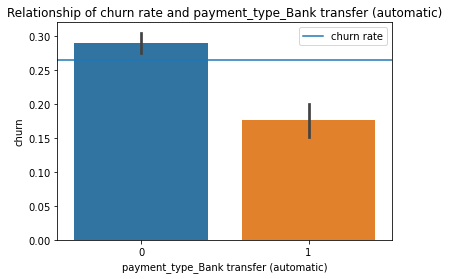

We reject the null hypothesis that payment_type_Bank transfer (automatic) and churn rate are independent
There is a relationship between churn rate and payment_type_Bank transfer (automatic)


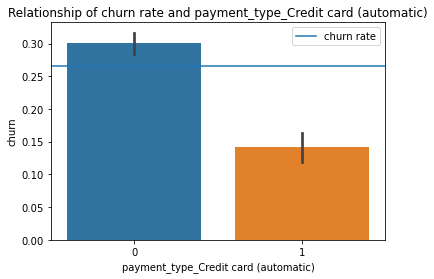

We reject the null hypothesis that payment_type_Credit card (automatic) and churn rate are independent
There is a relationship between churn rate and payment_type_Credit card (automatic)


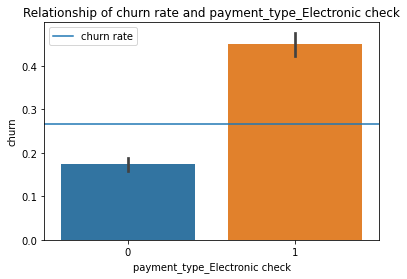

We reject the null hypothesis that payment_type_Electronic check and churn rate are independent
There is a relationship between churn rate and payment_type_Electronic check


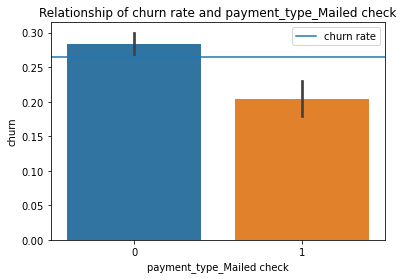

We reject the null hypothesis that payment_type_Mailed check and churn rate are independent
There is a relationship between churn rate and payment_type_Mailed check


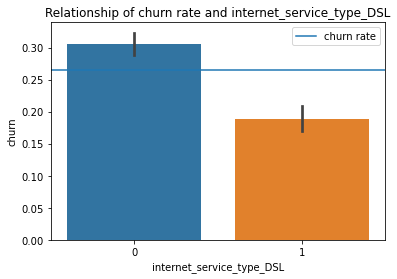

We reject the null hypothesis that internet_service_type_DSL and churn rate are independent
There is a relationship between churn rate and internet_service_type_DSL


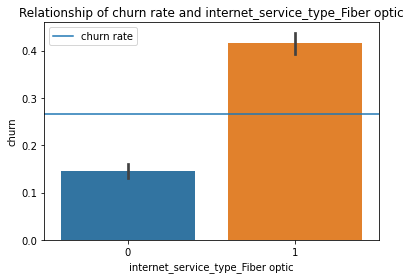

We reject the null hypothesis that internet_service_type_Fiber optic and churn rate are independent
There is a relationship between churn rate and internet_service_type_Fiber optic


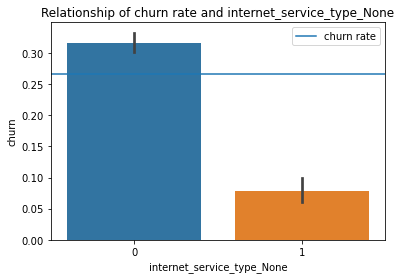

We reject the null hypothesis that internet_service_type_None and churn rate are independent
There is a relationship between churn rate and internet_service_type_None


In [45]:
# execute tests for cat_vars
for col in cats:
    cat_analysis(train, col)

## Categorical Drivers of churn
- senior citizens are more likely to churn
- no significant relationship between gender and churn
- those without dependents or partners are more likely to churn
- phone service does not seem to correlate to churn
- multiple lines has no relationship to churn
- those with paperless billing are much more likely to churn
- those with month-to-month billing are far more likely to churn, while those with one/two year billing are less likely
- electronic check was the only payment type more likely to churn



In [ ]:
# plot numerical data
for col in nums:
    sns.histplot(x=col, data=train, hue='churn',multiple = 'stack', palette="muted")
    plt.show()

## Numerical drivers of churn
- churn decreases as tenure increases
- monthly charges of those who churn is higher around between 90-100 per month

In [46]:
# are tenure and total charges correlated?
H0 = 'there is no correlation between tenure and total charges'
Ha = 'there is correlation between tenure and total charges'

alpha = .05
corr, p = stats.pearsonr(train.total_charges, train.tenure)
print('The corellation coefficient is', corr)
print('The P-value is', p)
if p < alpha:
    print('We reject the null hypothesis that', H0)
    print(Ha)
else:
    print('We fail to reject the null hypothesis that', H0)

The corellation coefficient is 0.8201595524555583
The P-value is 0.0
We reject the null hypothesis that there is no correlation between tenure and total charges
there is correlation between tenure and total charges


### Because there is a very high rate of correlation between tenure and total charges.  Using both for a model may not be necessary/desired.

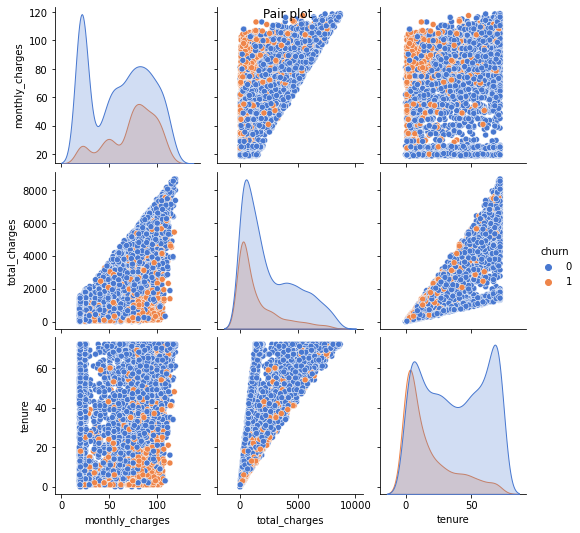

In [55]:
sns.pairplot(data=train,
             vars = ["monthly_charges", "total_charges", "tenure"], 
             kind="scatter",                      
             diag_kind="kde",                       
             hue="churn",
             palette="muted"
             )

plt.suptitle("Pair plot")   # adds title to the plot
plt.show()

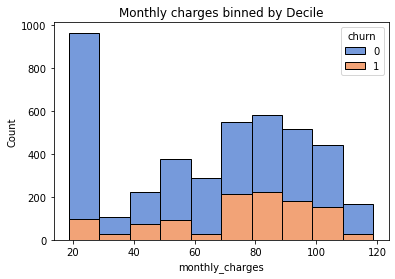

In [48]:
# binning monthly charges to better see the range where churn is high
sns.histplot(x='monthly_charges', data=train, hue='churn',multiple = 'stack', bins=10, palette='muted')
plt.title('Monthly charges binned by Decile')
plt.show()

Churn peaks when monthly charges are in the 60th to 90th percentile

## Any difference by grouping add-on services into one category?

In [50]:
# create subset of customers that have add-ons
has_add_on = train[(train.online_security_Yes == 1) |
                   (train.online_backup_Yes == 1) |
                   (train.device_protection_Yes == 1) |
                   (train.tech_support_Yes == 1) | 
                   (train.streaming_tv_Yes == 1) |
                   (train.streaming_movies_Yes == 1)]

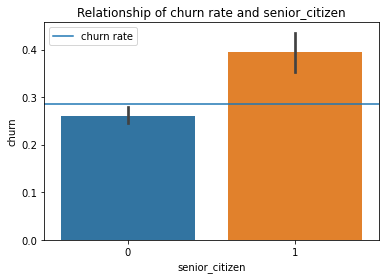

We reject the null hypothesis that senior_citizen and churn rate are independent
There is a relationship between churn rate and senior_citizen


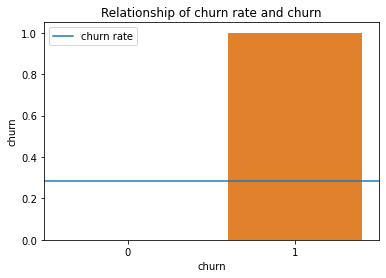

We reject the null hypothesis that churn and churn rate are independent
There is a relationship between churn rate and churn


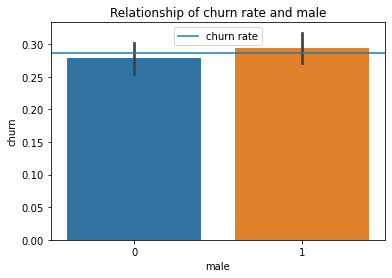

We fail to reject the null hypothesis that male and churn rate are independent
There appears to be no relationship between churn rate and male


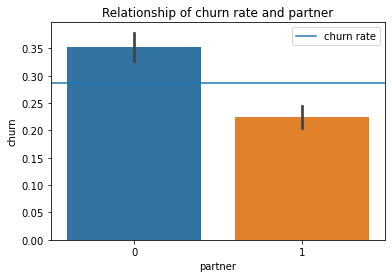

We reject the null hypothesis that partner and churn rate are independent
There is a relationship between churn rate and partner


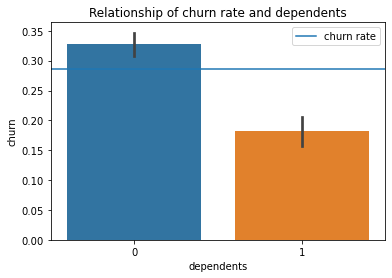

We reject the null hypothesis that dependents and churn rate are independent
There is a relationship between churn rate and dependents


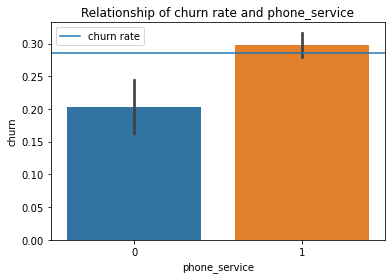

We reject the null hypothesis that phone_service and churn rate are independent
There is a relationship between churn rate and phone_service


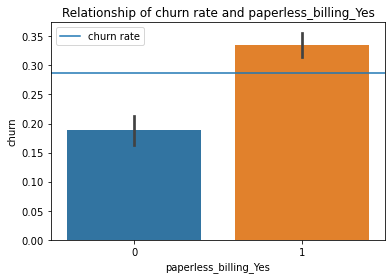

We reject the null hypothesis that paperless_billing_Yes and churn rate are independent
There is a relationship between churn rate and paperless_billing_Yes


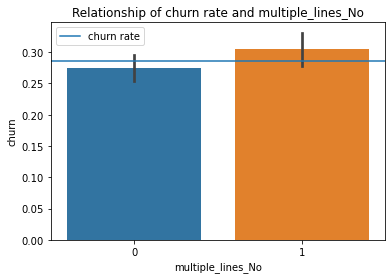

We fail to reject the null hypothesis that multiple_lines_No and churn rate are independent
There appears to be no relationship between churn rate and multiple_lines_No


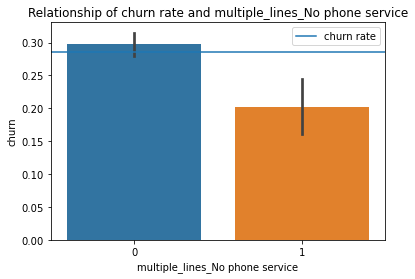

We reject the null hypothesis that multiple_lines_No phone service and churn rate are independent
There is a relationship between churn rate and multiple_lines_No phone service


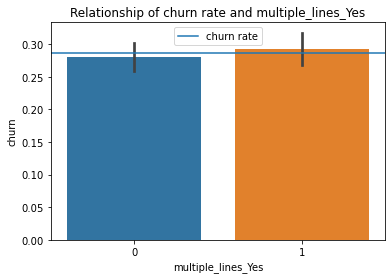

We fail to reject the null hypothesis that multiple_lines_Yes and churn rate are independent
There appears to be no relationship between churn rate and multiple_lines_Yes


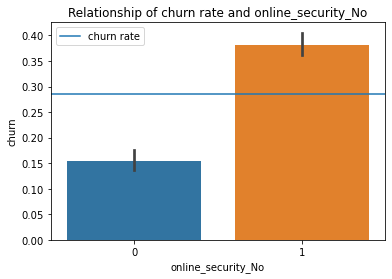

We reject the null hypothesis that online_security_No and churn rate are independent
There is a relationship between churn rate and online_security_No


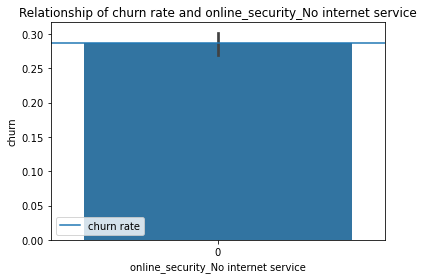

We fail to reject the null hypothesis that online_security_No internet service and churn rate are independent
There appears to be no relationship between churn rate and online_security_No internet service


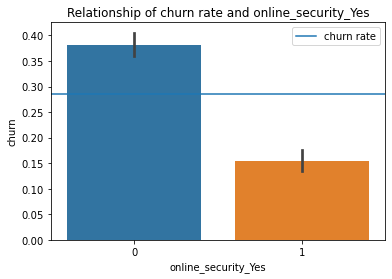

We reject the null hypothesis that online_security_Yes and churn rate are independent
There is a relationship between churn rate and online_security_Yes


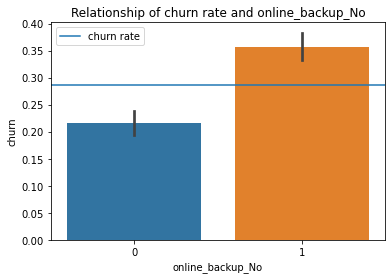

We reject the null hypothesis that online_backup_No and churn rate are independent
There is a relationship between churn rate and online_backup_No


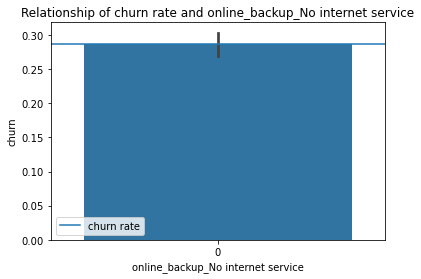

We fail to reject the null hypothesis that online_backup_No internet service and churn rate are independent
There appears to be no relationship between churn rate and online_backup_No internet service


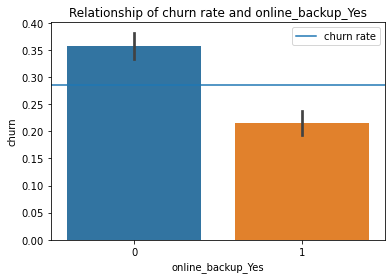

We reject the null hypothesis that online_backup_Yes and churn rate are independent
There is a relationship between churn rate and online_backup_Yes


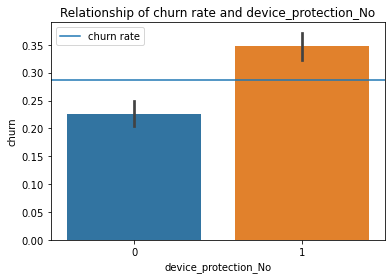

We reject the null hypothesis that device_protection_No and churn rate are independent
There is a relationship between churn rate and device_protection_No


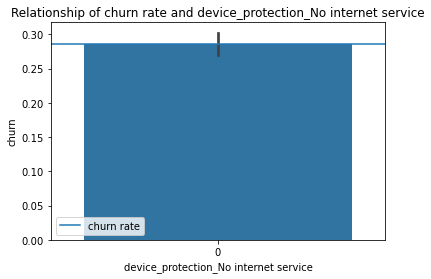

We fail to reject the null hypothesis that device_protection_No internet service and churn rate are independent
There appears to be no relationship between churn rate and device_protection_No internet service


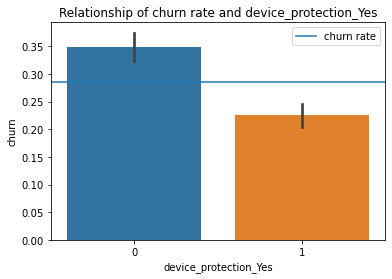

We reject the null hypothesis that device_protection_Yes and churn rate are independent
There is a relationship between churn rate and device_protection_Yes


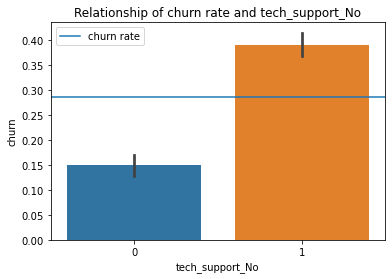

We reject the null hypothesis that tech_support_No and churn rate are independent
There is a relationship between churn rate and tech_support_No


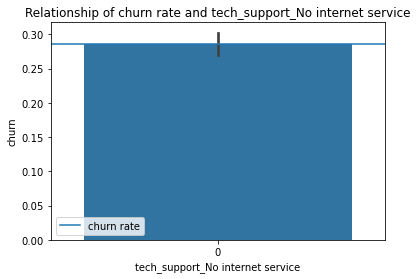

We fail to reject the null hypothesis that tech_support_No internet service and churn rate are independent
There appears to be no relationship between churn rate and tech_support_No internet service


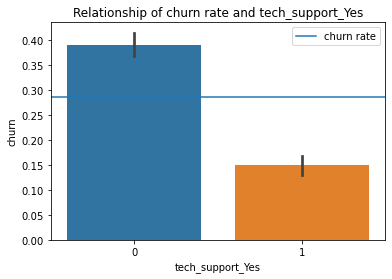

We reject the null hypothesis that tech_support_Yes and churn rate are independent
There is a relationship between churn rate and tech_support_Yes


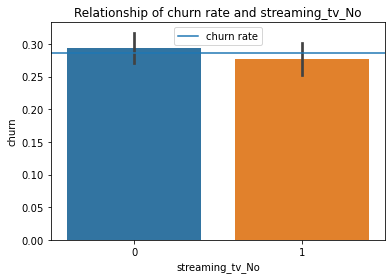

We fail to reject the null hypothesis that streaming_tv_No and churn rate are independent
There appears to be no relationship between churn rate and streaming_tv_No


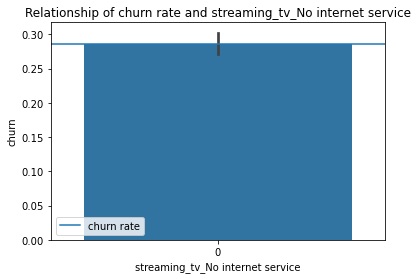

We fail to reject the null hypothesis that streaming_tv_No internet service and churn rate are independent
There appears to be no relationship between churn rate and streaming_tv_No internet service


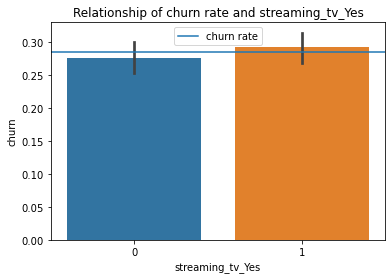

We fail to reject the null hypothesis that streaming_tv_Yes and churn rate are independent
There appears to be no relationship between churn rate and streaming_tv_Yes


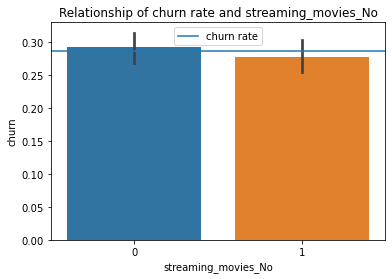

We fail to reject the null hypothesis that streaming_movies_No and churn rate are independent
There appears to be no relationship between churn rate and streaming_movies_No


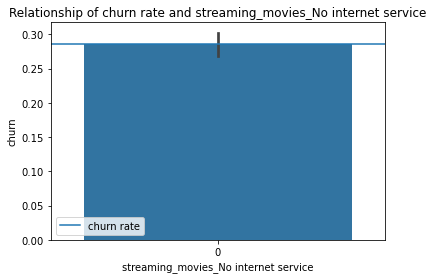

We fail to reject the null hypothesis that streaming_movies_No internet service and churn rate are independent
There appears to be no relationship between churn rate and streaming_movies_No internet service


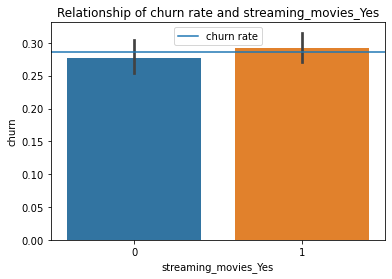

We fail to reject the null hypothesis that streaming_movies_Yes and churn rate are independent
There appears to be no relationship between churn rate and streaming_movies_Yes


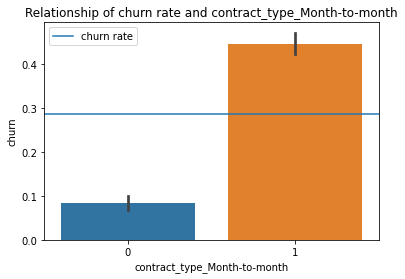

We reject the null hypothesis that contract_type_Month-to-month and churn rate are independent
There is a relationship between churn rate and contract_type_Month-to-month


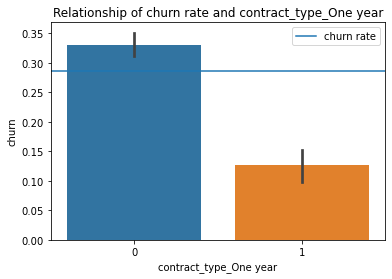

We reject the null hypothesis that contract_type_One year and churn rate are independent
There is a relationship between churn rate and contract_type_One year


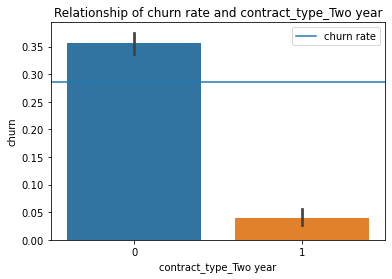

We reject the null hypothesis that contract_type_Two year and churn rate are independent
There is a relationship between churn rate and contract_type_Two year


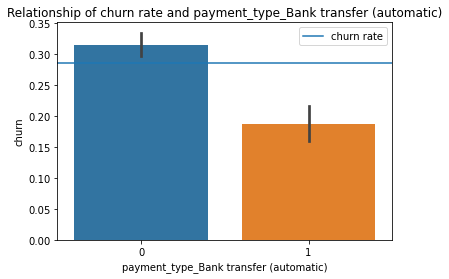

We reject the null hypothesis that payment_type_Bank transfer (automatic) and churn rate are independent
There is a relationship between churn rate and payment_type_Bank transfer (automatic)


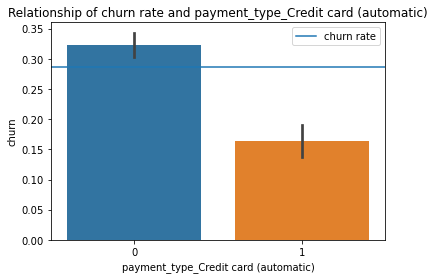

We reject the null hypothesis that payment_type_Credit card (automatic) and churn rate are independent
There is a relationship between churn rate and payment_type_Credit card (automatic)


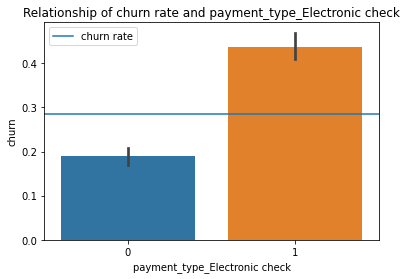

We reject the null hypothesis that payment_type_Electronic check and churn rate are independent
There is a relationship between churn rate and payment_type_Electronic check


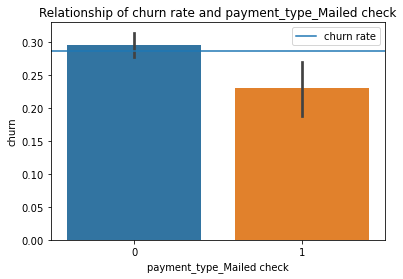

We reject the null hypothesis that payment_type_Mailed check and churn rate are independent
There is a relationship between churn rate and payment_type_Mailed check


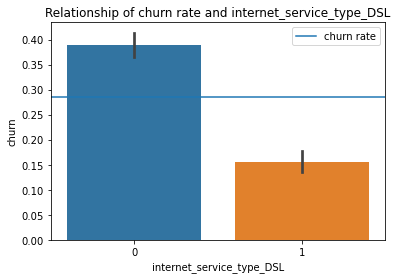

We reject the null hypothesis that internet_service_type_DSL and churn rate are independent
There is a relationship between churn rate and internet_service_type_DSL


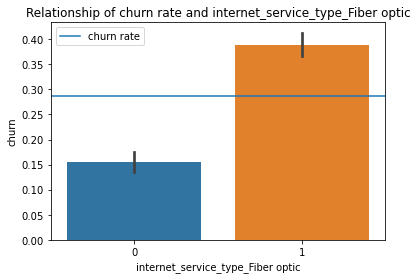

We reject the null hypothesis that internet_service_type_Fiber optic and churn rate are independent
There is a relationship between churn rate and internet_service_type_Fiber optic


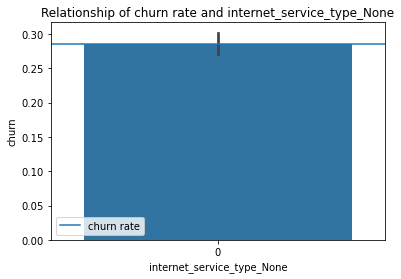

We fail to reject the null hypothesis that internet_service_type_None and churn rate are independent
There appears to be no relationship between churn rate and internet_service_type_None


In [51]:
# execute tests for cat_vars on the subset of customers with add-ons
for col in cats:
    cat_analysis(has_add_on, col)

No significant differences in the subset of customers that have add-on services.  The same factors drive churn

## Creating a new column for number of add-ons 


In [52]:
# add column with # of add-ons for each customer

train['num_add_ons'] = train['online_security_Yes'] + train['online_backup_Yes'] + train['device_protection_Yes'] + train['tech_support_Yes'] + train['streaming_tv_Yes'] + train['streaming_movies_Yes']
train.head()


,senior_citizen,tenure,monthly_charges,total_charges,churn,male,partner,dependents,phone_service,paperless_billing_Yes,...,contract_type_One year,contract_type_Two year,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,num_add_ons
5199,0,71,108.60,7690.90,1,1,1,0,1,1,...,0,1,0,1,0,0,0,1,0,5
4684,0,30,25.10,789.55,0,0,1,1,1,1,...,0,1,0,0,0,1,0,0,1,0
4687,0,71,58.65,4145.25,0,0,1,1,0,0,...,0,1,0,0,0,1,1,0,0,5
1001,0,56,73.85,4092.85,1,0,0,0,1,1,...,0,0,0,0,1,0,0,1,0,1
3121,1,69,110.55,7610.10,0,1,1,0,1,1,...,1,0,0,0,0,1,0,1,0,5


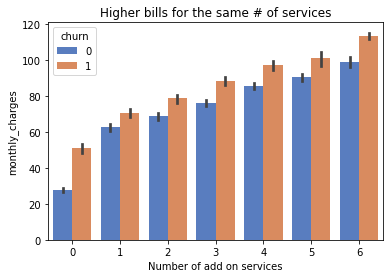

In [53]:
sns.barplot(x='num_add_ons', y='monthly_charges', data=train, hue='churn', palette='muted')
plt.title('Higher bills for the same # of services')
plt.xlabel('Number of add on services')
plt.show()

People that have higher bills with the same # of add-ons churn more

In [ ]:
sns.relplot(data=train, x='monthly_charges', y='num_add_ons', hue='churn')
plt.show()

In [ ]:
sns.catplot(x="num_add_ons", y="monthly_charges", hue="churn",  data=train)
plt.show()


In [ ]:
# adding the num_add_ons column to the pair plot of other numerical values
sns.pairplot(data=train,
             vars = ["monthly_charges", "total_charges", "tenure", 'num_add_ons'], 
             kind="scatter",                      
             diag_kind="kde",                       
             hue="churn",
             palette="muted"
             )

plt.suptitle("Pair plot")   # adds title to the plot
plt.show()

## Exploring Telco data to discover drivers of churn
    Drivers of churn appear to be:
        - Senior Citizens
        - Lack of dependents/partners
        - Paperless Billing
        - Month-to-month contract
        - Electronic Check as payment type
        - monthly bill between $70-110
        - Shorter tenure
        - Higher bills for similar services
    Determine if certain columns should be dropped
        - Gender, phone service, multiple-lines, total charges?
        - Possibly tenure since it is affected by churn, or total charges since it is closely correlated with churn
        - without knowing anything about how models are constructed this is a difficult question to answer
        
    Determine if it would be valuable to bin some numeric columns
        - binning of monthly charges helped to narrow down the range of bills more likely to churn
        
    Determine if it would be valuable to combine multiple columns into one.
        - combining add-ons did not affect the observations of how other columns affected churn
        - creating a column for # of add ons revealed that customers with higher bills for similar services churned